In [1]:
from google.colab import files
uploaded = files.upload()


Saving first inten project.csv to first inten project.csv


In [2]:
import pandas as pd
df = pd.read_csv('first inten project.csv')
df.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(df.head())
print(df.info())
print(df.describe())

  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   

In [11]:
print(df.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [12]:
print(df.dtypes)

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


In [13]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].str.strip().unique())

Column: Booking_ID
['INN00001' 'INN00002' 'INN00003' ... 'INN36284' 'INN36285' 'INN36286']
Column: type of meal
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Column: room type
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Column: market segment type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
Column: date of reservation
['10/2/2015' '11/6/2018' '2/28/2018' '5/20/2017' '4/11/2018' '9/13/2016'
 '10/15/2017' '12/26/2018' '7/6/2018' '10/18/2018' '9/11/2018' '4/30/2018'
 '11/26/2018' '11/20/2018' '10/20/2017' '6/15/2018' '10/5/2017'
 '8/10/2017' '10/30/2017' '10/4/2017' '11/25/2018' '3/20/2018'
 '10/13/2018' '5/22/2018' '4/28/2018' '9/21/2017' '5/19/2018' '11/6/2017'
 '9/17/2017' '9/19/2017' '11/13/2018' '12/7/2018' '1/9/2018' '10/7/2018'
 '4/27/2018' '6/19/2018' '10/17/2017' '11/19/2018' '7/30/2018' '11/1/2018'
 '6/21/2018' '4/10/2018' '6/27/2018' '11/18/2017' '12/29/2017'
 '11/20/2017' '4/6/2018' '12/29/20

In [17]:
import numpy as np

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = num_cols.difference(['Booking_ID', 'P-C', 'P-not-C'])

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in num_cols:
    outliers = detect_outliers(df, col)
    if not outliers.empty:
        print(f"Outliers in {col}: {len(outliers)}")
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))


Outliers in average price : 1696
Outliers in car parking space: 1124
Outliers in lead time: 1332
Outliers in number of adults: 10175
Outliers in number of children: 2702
Outliers in number of week nights: 324
Outliers in number of weekend nights: 21
Outliers in repeated: 930
Outliers in special requests: 762


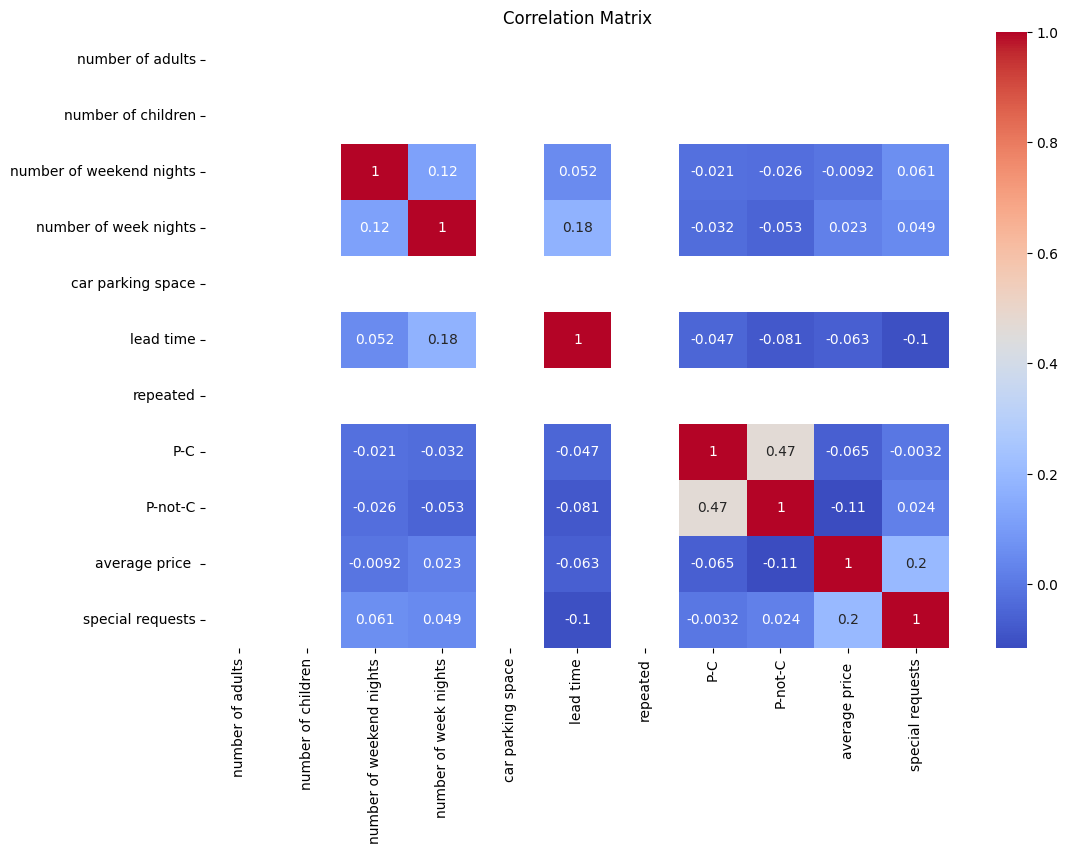

In [18]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

df = df.drop(['Booking_ID', 'P-C', 'P-not-C'], axis=1)

In [22]:

df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
df['booking_month'] = df['date of reservation'].dt.month
df = df.dropna(subset=['date of reservation'])


In [27]:
from sklearn.preprocessing import LabelEncoder

if 'booking status' in df.columns:
    le = LabelEncoder()
    df['booking status'] = le.fit_transform(df['booking status'].astype(str))

cat_cols = [col for col in ['type of meal', 'room type', 'market segment type'] if col in df.columns]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df = df.drop('date of reservation', axis=1, errors='ignore')


In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('booking status', axis=1)
y = df['booking status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Logistic Regression:
Accuracy: 0.7995402298850575
              precision    recall  f1-score   support

           0       0.73      0.61      0.66      3517
           1       0.83      0.89      0.86      7358

    accuracy                           0.80     10875
   macro avg       0.78      0.75      0.76     10875
weighted avg       0.79      0.80      0.79     10875



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Random Forest:
Accuracy: 0.8900229885057471
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      3517
           1       0.91      0.93      0.92      7358

    accuracy                           0.89     10875
   macro avg       0.88      0.87      0.87     10875
weighted avg       0.89      0.89      0.89     10875



In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7995
Random Forest Accuracy: 0.8900
XGBoost Accuracy: 0.8829


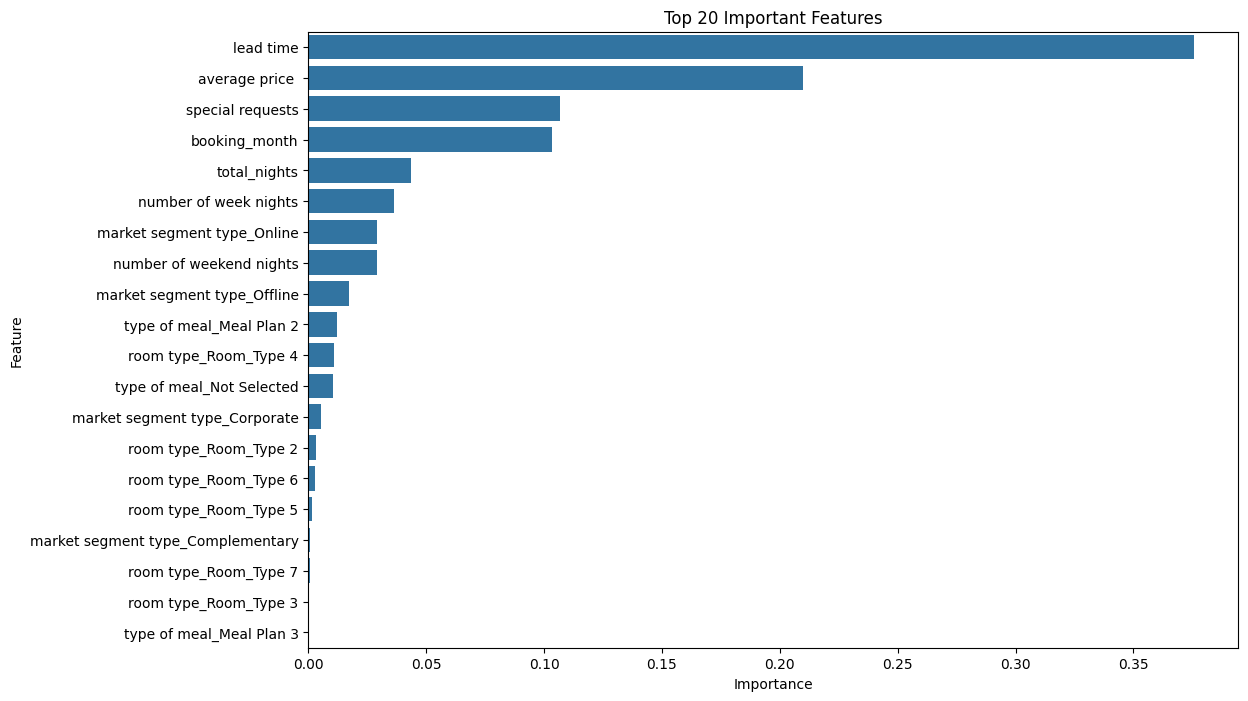

In [34]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
plt.title('Top 20 Important Features')
plt.show()

Confusion Matrix:
[[2766  751]
 [ 523 6835]]


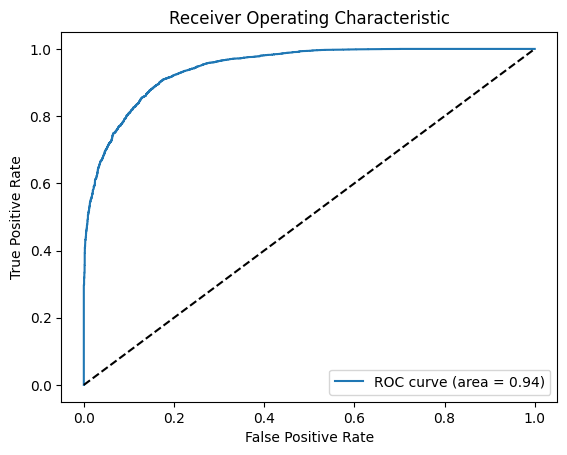

In [37]:

best_model = XGBClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import roc_curve, auc

y_pred_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()